In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json

In [19]:
# Techniques - ordered!
TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

### Load all files

In [28]:
pp_recipes = pd.read_csv("data/PP_recipes.csv")
pp_users = pd.read_csv("data/PP_users.csv")
raw_interactions = pd.read_csv("data/RAW_interactions.csv")
raw_recipes = pd.read_csv("data/RAW_recipes.csv")
ingr_map = pd.read_pickle("data/ingr_map.pkl")


### Show shapes and columns of each file

In [29]:
for name, df in [("PP_recipes", pp_recipes), ("PP_users", pp_users),
                 ("RAW_interactions", raw_interactions), ("RAW_recipes", raw_recipes)]:
    print(name, df.shape)
    print(df.columns)
    print()

PP_recipes (178265, 8)
Index(['id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens',
       'techniques', 'calorie_level', 'ingredient_ids'],
      dtype='object')

PP_users (25076, 6)
Index(['u', 'techniques', 'items', 'n_items', 'ratings', 'n_ratings'], dtype='object')

RAW_interactions (1132367, 5)
Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')

RAW_recipes (231637, 12)
Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')



### Inspect Pre-processed (PP) files first

#### PP Recipes

In [30]:
pp_recipes.head()
pp_recipes.info()
pp_recipes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178265 entries, 0 to 178264
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 178265 non-null  int64 
 1   i                  178265 non-null  int64 
 2   name_tokens        178265 non-null  object
 3   ingredient_tokens  178265 non-null  object
 4   steps_tokens       178265 non-null  object
 5   techniques         178265 non-null  object
 6   calorie_level      178265 non-null  int64 
 7   ingredient_ids     178265 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.9+ MB


id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64

##### Convert List Columns from Strings → Python Lists

In [31]:
import ast

list_cols = ["name_tokens", "ingredient_tokens", "steps_tokens", "techniques", "ingredient_ids"]

for col in list_cols:
    pp_recipes[col] = pp_recipes[col].apply(ast.literal_eval)


In [32]:
pp_recipes.iloc[0].ingredient_ids   # should show a Python list, not a string
type(pp_recipes.iloc[0].ingredient_ids)


list

Text(0.5, 1.0, 'Number of Ingredients per Recipe')

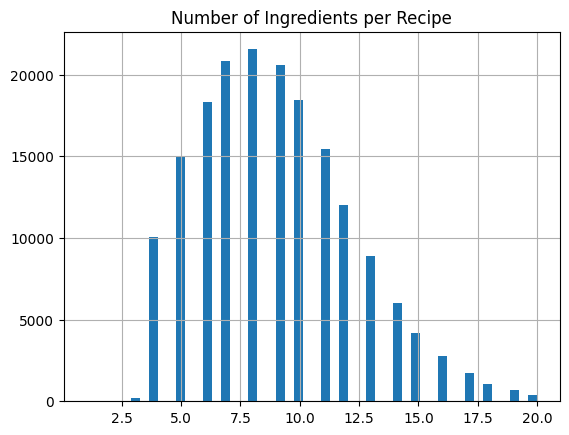

In [ ]:
pp_recipes["n_ingredients"] = pp_recipes["ingredient_ids"].apply(len)

pp_recipes["n_ingredients"].hist(bins=50)
plt.title("Number of Ingredients per Recipe")


In [34]:
def decode_techniques(onehot):
    return [TECHNIQUES_LIST[i] for i, val in enumerate(onehot) if val == 1]

pp_recipes["techniques_decoded"] = pp_recipes["techniques"].apply(decode_techniques)


In [35]:
from collections import Counter

tech_counter = Counter()

for t_list in pp_recipes["techniques_decoded"]:
    tech_counter.update(t_list)

tech_df = pd.DataFrame(
    tech_counter.most_common(20),
    columns=["technique", "count"]
)

tech_df


,technique,count
0,bake,64821
1,combine,60136
2,pour,48747
3,boil,42354
4,melt,30865
5,drain,29567
6,blend,29387
7,simmer,29380
8,skillet,26825
9,refrigerat,20543


In [37]:
import numpy as np

total_counts = np.array(pp_recipes["techniques"].tolist()).sum(axis=0)

tech_df = pd.DataFrame({
    "technique": TECHNIQUES_LIST,
    "count": total_counts
}).sort_values("count", ascending=False)

tech_df

,technique,count
0,bake,64821
9,combine,60136
33,pour,48747
4,boil,42354
28,melt,30865
16,drain,29567
3,blend,29387
42,simmer,29380
43,skillet,26825
36,refrigerat,20543


Text(0.5, 1.0, 'Number of Steps per Recipe')

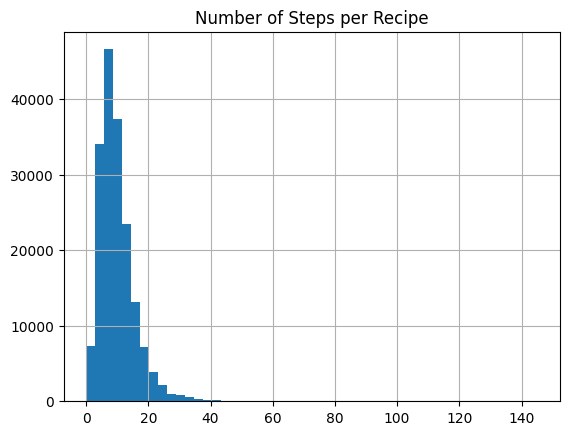

In [41]:
pp_recipes["n_steps"] = raw_recipes["n_steps"]
pp_recipes["n_steps"].hist(bins=50)
plt.title("Number of Steps per Recipe")


In [43]:
pp_recipes.head(2)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_ingredients,techniques_decoded,n_steps
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",5,"[combine, drain, strain]",11
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",12,"[bake, combine, melt, pour, refrigerat, smooth...",9


#### Add nutrition data

In [45]:
raw = raw_recipes.copy()
pp = pp_recipes.copy()


In [47]:
print(pp.columns)
print(raw.columns)


Index(['id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens',
       'techniques', 'calorie_level', 'ingredient_ids', 'n_ingredients',
       'techniques_decoded', 'n_steps'],
      dtype='object')
Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


In [48]:
import ast

raw["nutrition"] = raw["nutrition"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [49]:
nutrition_cols = [
    "calories",
    "total_fat_PDV",
    "sugar_PDV",
    "sodium_PDV",
    "protein_PDV",
    "saturated_fat_PDV",
    "carbs_PDV"
]

nutrition_df = pd.DataFrame(raw["nutrition"].tolist(), columns=nutrition_cols)


In [50]:
raw = pd.concat([raw.drop(columns=["nutrition"]), nutrition_df], axis=1)


In [54]:
raw.head(2)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbs_PDV
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0


In [55]:
pp_recipes = pp_recipes.merge(
    raw[["id"] + nutrition_cols],
    on="id",
    how="left"
)

In [56]:
pp_recipes.head(2)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_ingredients,techniques_decoded,n_steps,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbs_PDV
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",5,"[combine, drain, strain]",11,228.2,2.0,2.0,8.0,9.0,1.0,15.0
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",12,"[bake, combine, melt, pour, refrigerat, smooth...",9,249.4,16.0,92.0,8.0,11.0,27.0,11.0


Text(0.5, 0.98, 'Nutrition Distributions Across Recipes')

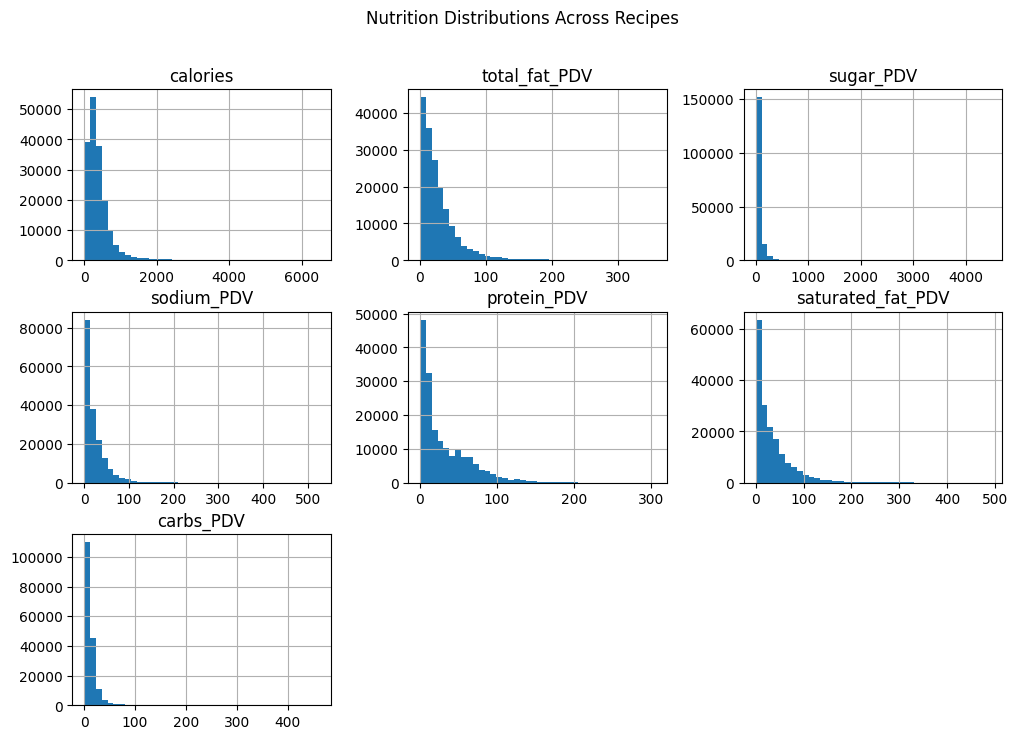

In [70]:
nutrition_cols = [
    "calories","total_fat_PDV","sugar_PDV","sodium_PDV",
    "protein_PDV","saturated_fat_PDV","carbs_PDV"
]

pp_no_outliers[nutrition_cols].hist(figsize=(12,8), bins=40)
plt.suptitle("Nutrition Distributions Across Recipes")


Text(0.5, 1.0, 'Ingredients vs Calories')

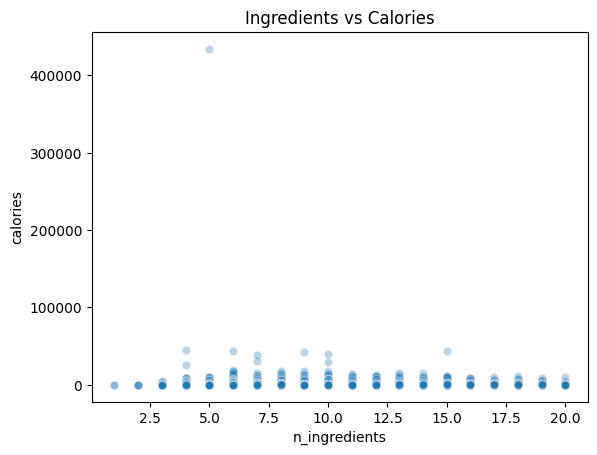

In [58]:
sns.scatterplot(
    data=pp_recipes,
    x="n_ingredients",
    y="calories",
    alpha=0.3
)
plt.title("Ingredients vs Calories")


Text(0.5, 1.0, 'Calories per Number of Steps')

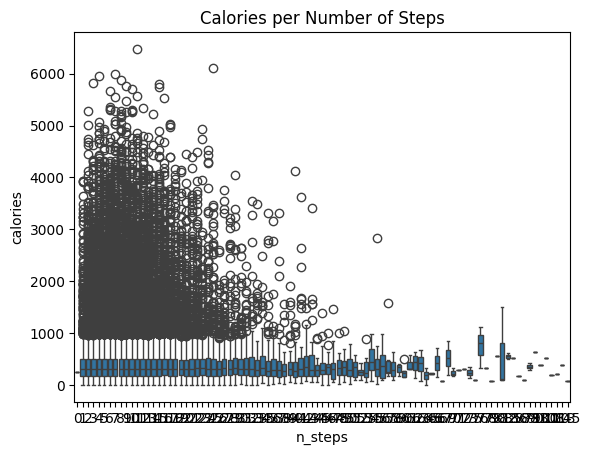

In [69]:
sns.boxplot(x=pp_no_outliers["n_steps"], y=pp_no_outliers["calories"])
plt.title("Calories per Number of Steps")


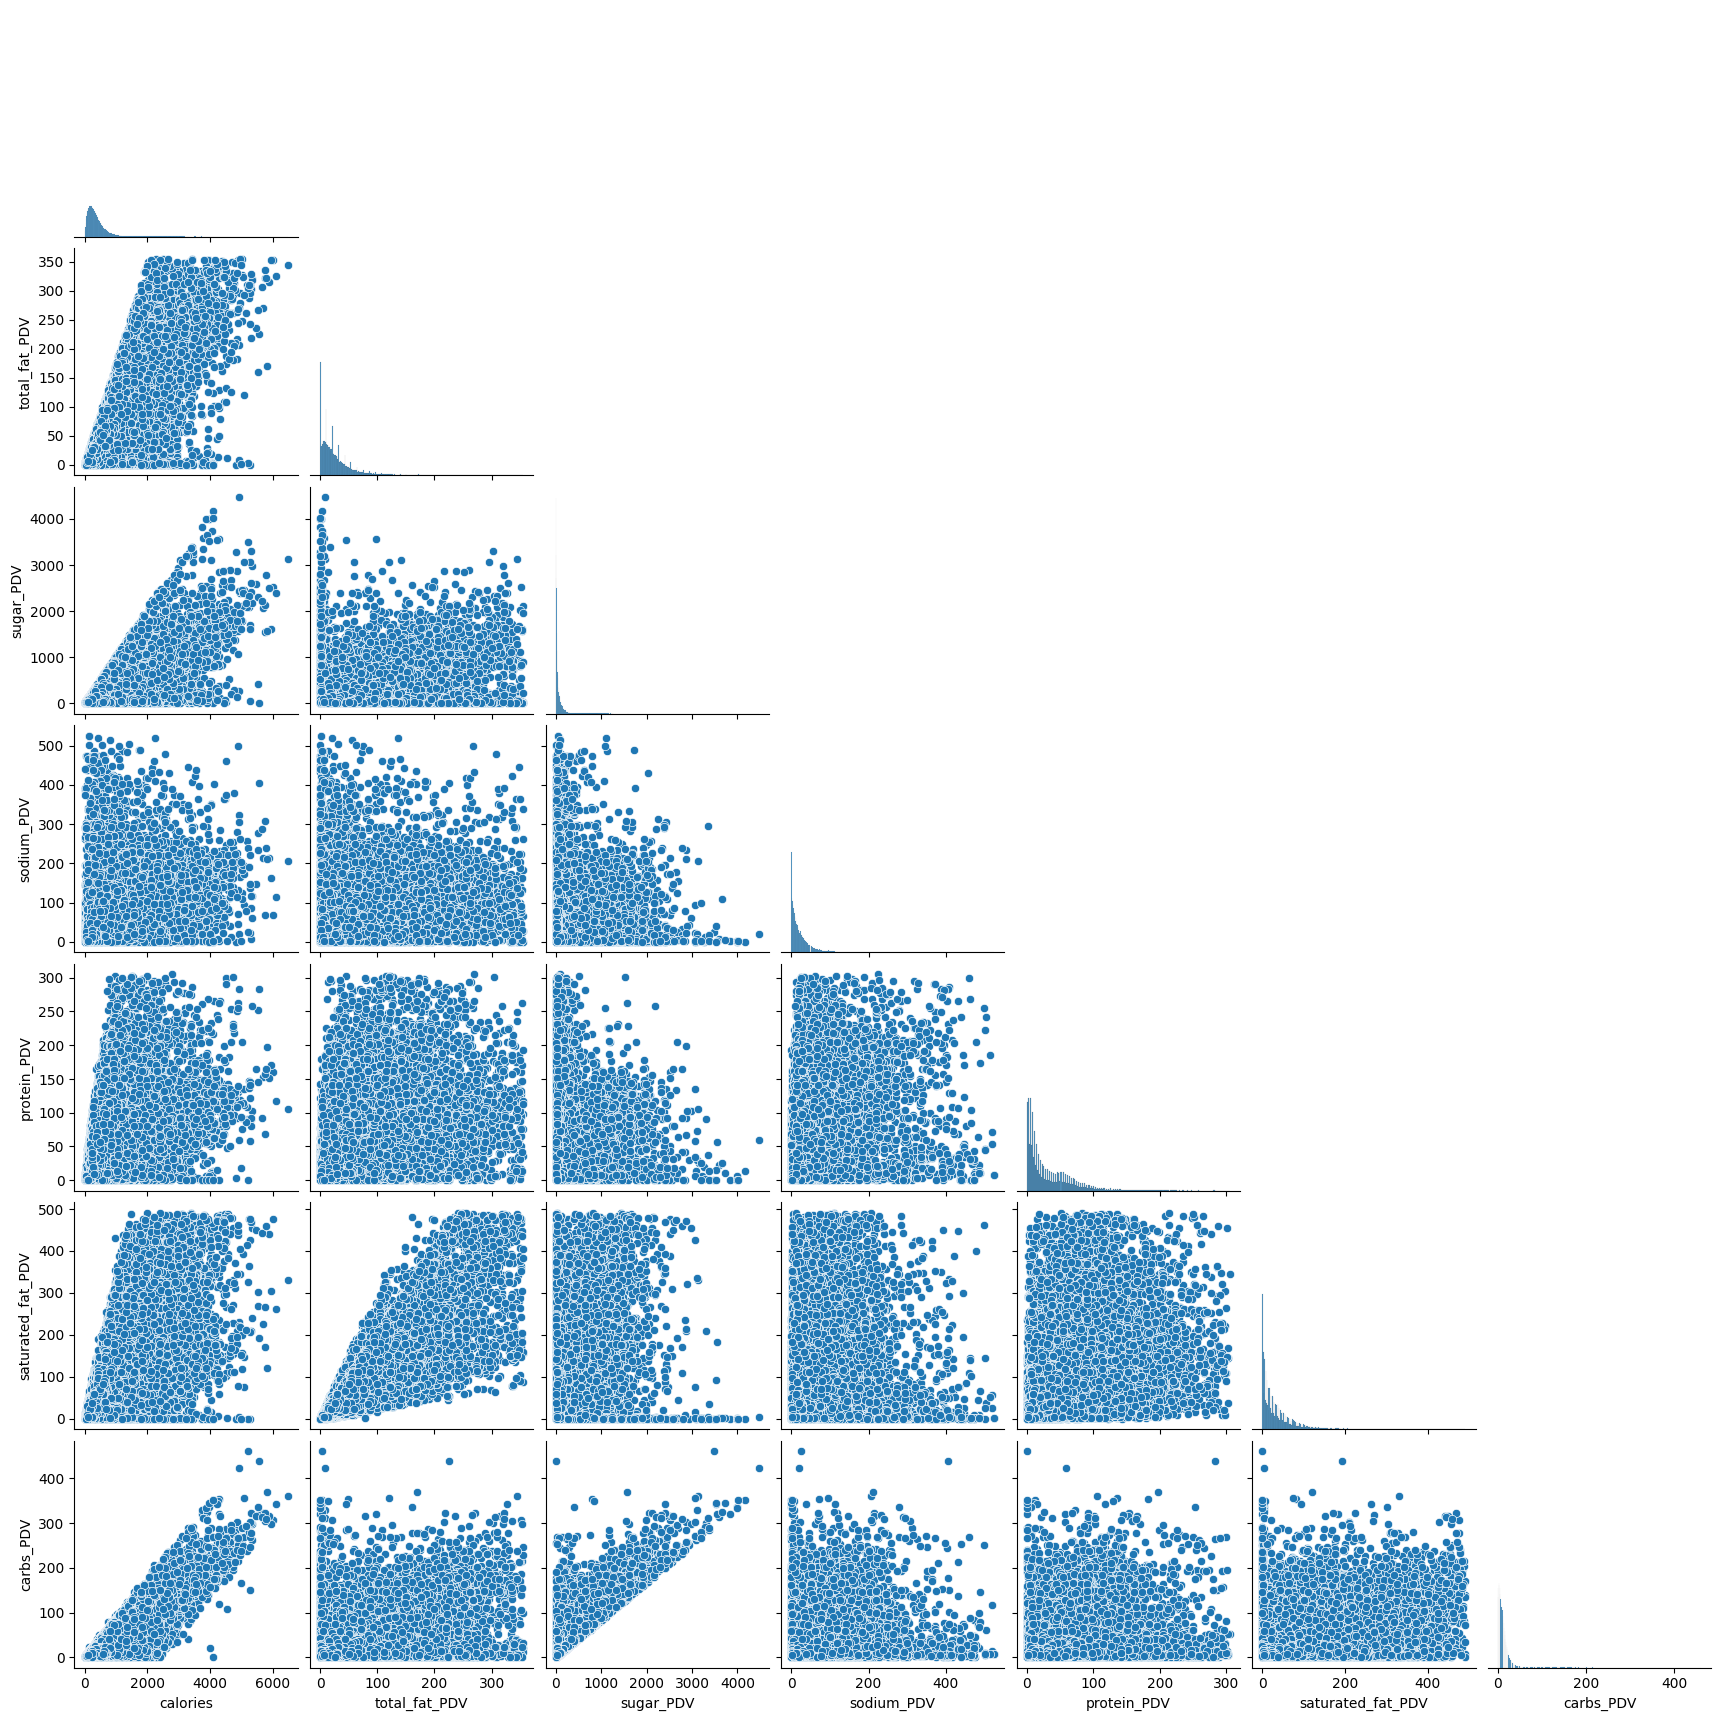

In [68]:
sns.pairplot(pp_no_outliers[nutrition_cols], corner=True)


#### removed extreme outlier and reran all graphs

In [66]:
from scipy.stats import zscore

nutrition_cols = [
    "calories","total_fat_PDV","sugar_PDV","sodium_PDV",
    "protein_PDV","saturated_fat_PDV","carbs_PDV"
]

z = pp_recipes[nutrition_cols].apply(zscore)

pp_no_outliers = pp_recipes[(z.abs() < 5).all(axis=1)]


Text(0.5, 1.0, 'PCA (Standardized Nutrition + Complexity)')

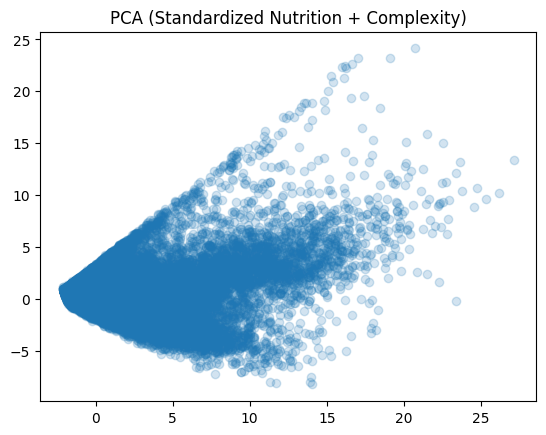

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = pp_no_outliers[["calories","total_fat_PDV","sugar_PDV","sodium_PDV",
                "protein_PDV","saturated_fat_PDV","carbs_PDV",
                "n_ingredients","n_steps"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

plt.scatter(pc[:,0], pc[:,1], alpha=0.2)
plt.title("PCA (Standardized Nutrition + Complexity)")



#### PP Users

In [14]:
pp_users.head()
pp_users.info()
pp_users.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25076 entries, 0 to 25075
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   u           25076 non-null  int64 
 1   techniques  25076 non-null  object
 2   items       25076 non-null  object
 3   n_items     25076 non-null  int64 
 4   ratings     25076 non-null  object
 5   n_ratings   25076 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64

In [15]:
import ast

list_cols = ["techniques", "items", "ratings"]

for col in list_cols:
    pp_users[col] = pp_users[col].apply(ast.literal_eval)


In [16]:
pp_users.iloc[0].items, type(pp_users.iloc[0].items)
pp_users.iloc[0].ratings, type(pp_users.iloc[0].ratings)
pp_users.iloc[0].techniques, type(pp_users.iloc[0].techniques)

([8,
  0,
  0,
  5,
  6,
  0,
  0,
  1,
  0,
  9,
  1,
  0,
  0,
  0,
  1,
  0,
  5,
  0,
  0,
  0,
  3,
  1,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  0,
  0,
  0,
  8,
  0,
  0,
  8,
  2,
  2,
  0,
  0,
  0,
  3,
  3,
  1,
  0,
  5,
  0,
  0,
  2,
  1,
  1,
  0,
  3,
  1,
  7,
  2,
  2],
 list)

In [72]:
pp_users.head(2)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39


Text(0, 0.5, 'Count')

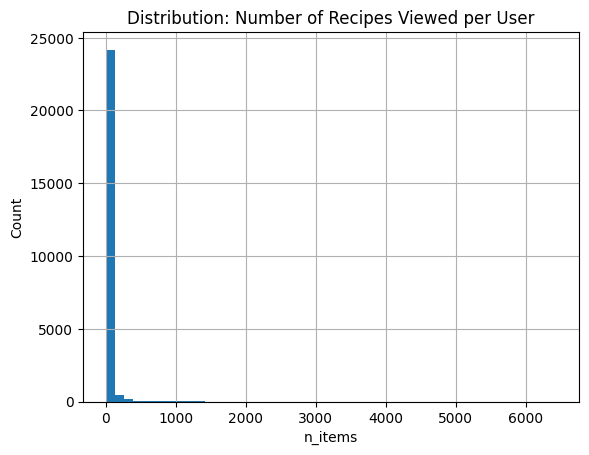

In [71]:
pp_users['n_items'].hist(bins=50)
plt.title("Distribution: Number of Recipes Viewed per User")
plt.xlabel("n_items")
plt.ylabel("Count")


In [79]:
import ast
import re

def parse_ratings(x):
    # Already a list → return it
    if isinstance(x, list):
        return x
    
    # If it's not even a string → skip
    if not isinstance(x, str):
        return []
    
    # Try literal_eval first (fast path)
    try:
        out = ast.literal_eval(x)
        if isinstance(out, list):
            return out
    except:
        pass
    
    # Fallback: extract only numbers using regex
    nums = re.findall(r"[-+]?\d*\.\d+|\d+", x)
    if len(nums) > 0:
        return [float(n) for n in nums]
    
    return []

pp_users["ratings"] = pp_users["ratings"].apply(parse_ratings)


In [80]:
pp_users["ratings"].head(10)


0    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...
1    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...
2    [3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...
3    [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...
4    [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...
5    [4.0, 4.0, 1.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, ...
6                                 [5.0, 5.0, 5.0, 5.0]
7    [0.0, 5.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8    [4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...
9                       [4.0, 5.0, 5.0, 3.0, 5.0, 5.0]
Name: ratings, dtype: object

In [81]:
pp_users["ratings"] = pp_users["ratings"].apply(lambda lst: [float(x) for x in lst])


In [82]:
pp_users["mean_rating"] = pp_users["ratings"].apply(
    lambda x: np.mean(x) if len(x) > 0 else np.nan
)


In [83]:
pp_users.head(2)

,u,techniques,items,n_items,ratings,n_ratings,mean_rating
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31,4.806452
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39,4.948718


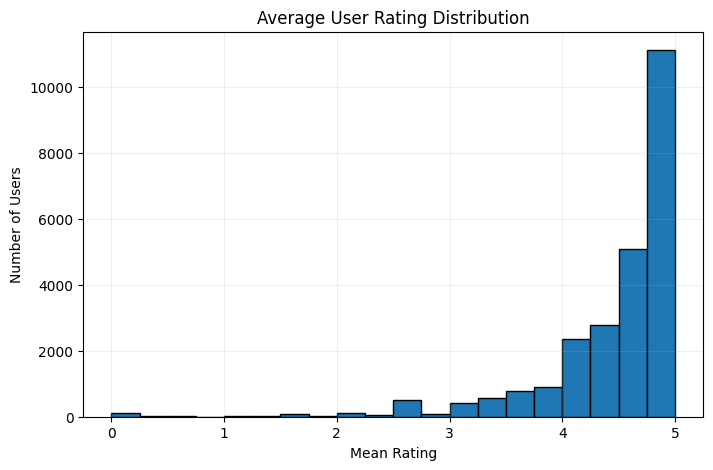

In [84]:
plt.figure(figsize=(8,5))
plt.hist(pp_users["mean_rating"].dropna(), bins=20, edgecolor="black")
plt.title("Average User Rating Distribution")
plt.xlabel("Mean Rating")
plt.ylabel("Number of Users")
plt.grid(alpha=0.2)
plt.show()


In [76]:
from collections import Counter

user_tech_counter = Counter()
for lst in pp_users['techniques']:
    user_tech_counter.update(lst)

pd.DataFrame(user_tech_counter.most_common(20), 
             columns=["technique", "count"])


,technique,count
0,",",1429332
1,,1429332
2,0,1063643
3,1,214884
4,2,84690
5,3,43992
6,4,27607
7,[,25076
8,],25076
9,5,19567
